In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting pandas to show all columns of the dataframe without truncation
pd.set_option('display.max_columns', None)

#### Loading and exploring the dataset

In [3]:
df = pd.read_csv("cleaned_dataset.csv")
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Time_bin,Manufactured_year,Age,Year_month,Date_time,Delay_status
0,2007,9,27,4,1104,1105,1243,1255,WN,110,N741SA,99.0,110.0,82.0,-12.0,-1.0,SEA,SMF,605,5,12,0,0,0,0,0,10am - 12pm,1998,9,2007-09,2007-09-27 11:05:00,0
1,2007,11,20,2,2120,2120,2255,2308,EV,4304,N355CA,95.0,108.0,67.0,-13.0,0.0,ATL,CLE,554,10,18,0,0,0,0,0,8pm - 10pm,2002,5,2007-11,2007-11-20 21:20:00,0
2,2007,7,16,1,1025,1030,1127,1133,OO,5799,N284YV,62.0,63.0,54.0,-6.0,-5.0,PDX,MFR,222,2,6,0,0,0,0,0,10am - 12pm,1994,13,2007-07,2007-07-16 10:30:00,0
3,2007,8,5,7,1448,1453,1529,1538,AQ,94,N837AL,41.0,45.0,32.0,-9.0,-5.0,HNL,KOA,163,2,7,0,0,0,0,0,2pm - 4pm,1985,22,2007-08,2007-08-05 14:53:00,0
4,2006,12,10,7,2027,1921,2235,2138,OO,6704,N943SW,68.0,77.0,55.0,57.0,66.0,DEN,LNK,423,3,10,0,0,0,0,57,6pm - 8pm,2003,3,2006-12,2006-12-10 19:21:00,1


In [4]:
#checking the number of rows and columns of the dataframe
df.shape

(5750846, 32)

### Q1) When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [5]:
#creating a seperate dataframe with only the necessary columns for the question
q1 = df.loc[:, ['Year', 'Month', 'DayofMonth', 'DayOfWeek','CRSDepTime','ArrDelay', 'Time_bin']]
q1.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay,Time_bin
0,2007,9,27,4,1105,-12.0,10am - 12pm
1,2007,11,20,2,2120,-13.0,8pm - 10pm
2,2007,7,16,1,1030,-6.0,10am - 12pm
3,2007,8,5,7,1453,-9.0,2pm - 4pm
4,2006,12,10,7,1921,57.0,6pm - 8pm


In [6]:
#calculating the average and standard deviation of delays for each time slot
hourly_delays = q1.groupby('Time_bin', as_index=False).agg(Avg_delay=('ArrDelay', 'mean'),
                                                    Standard_deviation=('ArrDelay', 'std'))

#getting the max delays of the time slots within one standard deviation above the mean
hourly_delays['Max_delay'] = (hourly_delays['Avg_delay'] + hourly_delays['Standard_deviation'])

In [7]:
#checking the hourly delays
hourly_delays.head(12)

,Time_bin,Avg_delay,Standard_deviation,Max_delay
0,10am - 12pm,6.223322,31.812904,38.036226
1,10pm - 12am,8.292581,35.579412,43.871992
2,12am - 2am,7.251309,50.513372,57.764681
3,12pm - 2pm,9.279221,37.095059,46.374280
4,2am - 4am,5.137663,38.227349,43.365012
5,2pm - 4pm,12.749162,40.955727,53.704889
6,4am - 6am,0.741603,31.341793,32.083396
7,4pm - 6pm,15.742587,43.855801,59.598387
8,6am - 8am,1.362288,30.344661,31.706949
9,6pm - 8pm,16.681323,44.165572,60.846895


In [8]:
#reordering the rows of hourly_delays dataframe
hourly_delays = hourly_delays.reindex([2, 4, 6, 8, 10, 0, 3, 5, 7, 9, 11, 1])

In [9]:
#getting the number of flights in each 2 hour time slot
q1['Time_bin'].value_counts()

6am - 8am      795718
8am - 10am     781139
4pm - 6pm      753306
10am - 12pm    753267
12pm - 2pm     735667
2pm - 4pm      709050
6pm - 8pm      667573
8pm - 10pm     406001
10pm - 12am    102030
4am - 6am       42725
2am - 4am        3988
12am - 2am        382
Name: Time_bin, dtype: int64

In [10]:
#getting a colour-blind friendly, colour palette
sns.reset_orig()
my_palette = sns.color_palette("colorblind")
plt.style.use('seaborn-colorblind')

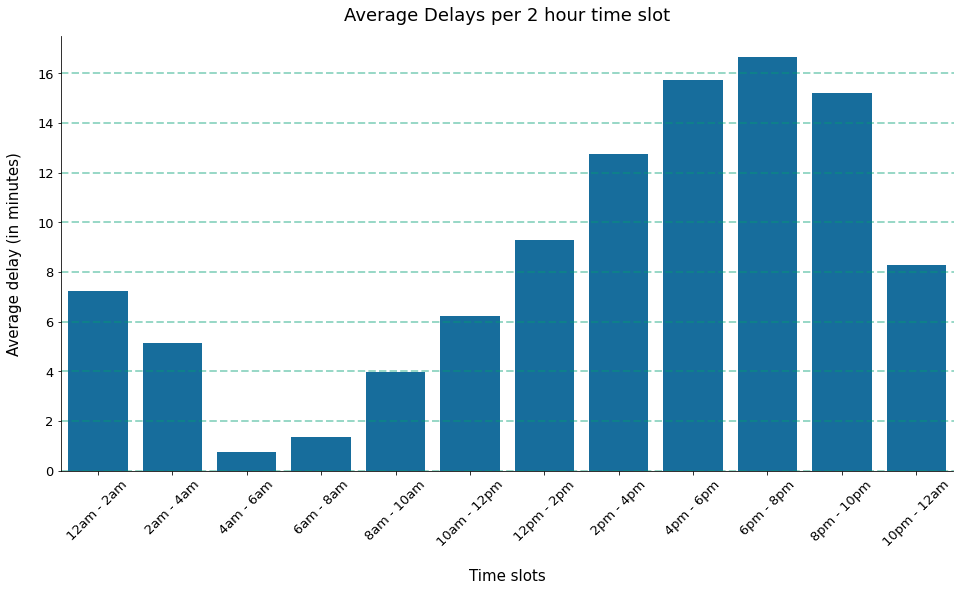

In [11]:
#plotting a barplot to visualise the average delay per 2 hour time slot
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

sns.barplot(x= "Time_bin", y = "Avg_delay", data = hourly_delays, color = my_palette[0])
plt.grid(color= my_palette[2], linestyle='--',linewidth=2, axis='y', alpha=0.4)
ax.set_ylabel('Average delay (in minutes)', size = 15, labelpad = 15)
ax.set_xlabel('Time slots', size = 15, labelpad = 20)
ax.set_title('Average Delays per 2 hour time slot', size = 18, pad = 15)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13, rotation=45)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("Delay per 2 hours.png", bbox_inches = 'tight')
plt.show()

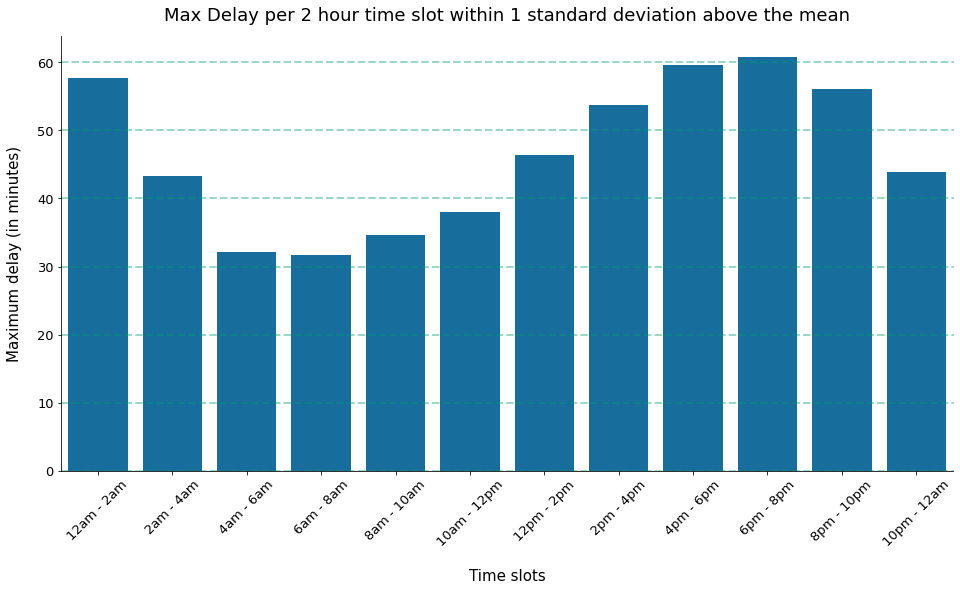

In [12]:
#plotting a barplot to visualise the maximum delay per 2 hour time slot within one standard deviation above the mean
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

sns.barplot(x= "Time_bin", y = "Max_delay", data = hourly_delays, color = my_palette[0])
plt.grid(color= my_palette[2], linestyle='--',linewidth=2, axis='y', alpha=0.4)
ax.set_ylabel('Maximum delay (in minutes)', size = 15, labelpad = 15)
ax.set_xlabel('Time slots', size = 15, labelpad = 20)
ax.set_title('Max Delay per 2 hour time slot within 1 standard deviation above the mean', size = 18, pad = 15)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13, rotation=45)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Max delay per 2 hours.png", bbox_inches = 'tight')
plt.show()

In [13]:
#the time slot between 6am - 8am is when passengers are most likely to minimze their delays.

In [14]:
#calculating the average and standard deviation of delays for each time slot
daily_delays = q1.groupby('DayOfWeek', as_index=False).agg(Avg_delay=('ArrDelay', 'mean'),
                                                    Standard_deviation=('ArrDelay', 'std'))

#getting the max delays of the time slots within one standard deviation
daily_delays['Max_delay'] = (daily_delays['Avg_delay'] + daily_delays['Standard_deviation'])

In [15]:
#checking the hourly delays
daily_delays.head(7)

,DayOfWeek,Avg_delay,Standard_deviation,Max_delay
0,1,9.786855,37.391072,47.177927
1,2,7.462359,35.556969,43.019327
2,3,9.187176,37.557426,46.744602
3,4,12.201661,40.841382,53.043043
4,5,12.728707,39.935459,52.664166
5,6,5.491551,33.650649,39.142201
6,7,9.208648,37.963945,47.172592


In [16]:
#getting the number of flights on each day
q1['DayOfWeek'].value_counts()

1    852953
5    849075
4    846380
3    838266
2    827799
7    809226
6    727147
Name: DayOfWeek, dtype: int64

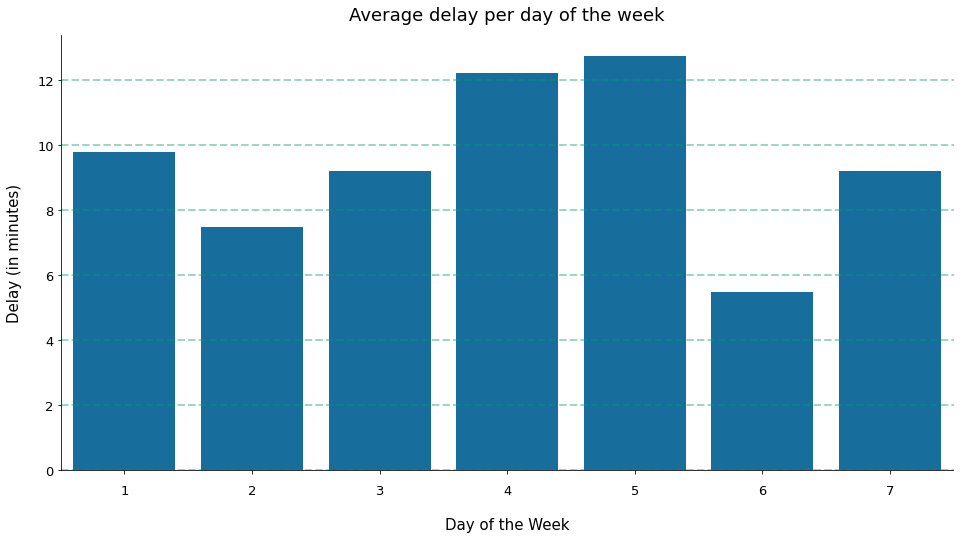

In [17]:
#plotting a barplot to visualise the average delay per day of the week
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

sns.barplot(x= 'DayOfWeek', y = 'Avg_delay', data = daily_delays, color = my_palette[0])
plt.grid(color= my_palette[2], linestyle='--',linewidth=2, axis='y', alpha=0.4)
ax.set_ylabel('Delay (in minutes)', size = 15, labelpad = 15)
ax.set_xlabel('Day of the Week', size = 15, labelpad = 20)
ax.set_title('Average delay per day of the week', size = 18, pad = 15)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13, pad = 10)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Delay per day.png", bbox_inches = 'tight')
plt.show()

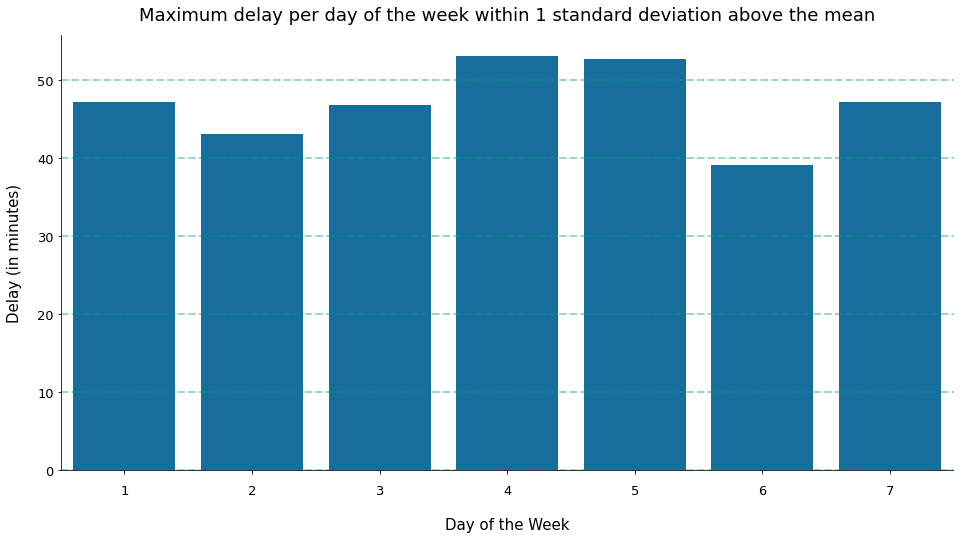

In [18]:
#plotting a barplot to visualise the maximum delay per day of the week within 1 standard deviation above the mean
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

sns.barplot(x= 'DayOfWeek', y = 'Max_delay', data = daily_delays, color = my_palette[0])
plt.grid(color= my_palette[2], linestyle='--',linewidth=2, axis='y', alpha=0.4)
ax.set_ylabel('Delay (in minutes)', size = 15, labelpad = 15)
ax.set_xlabel('Day of the Week', size = 15, labelpad = 20)
ax.set_title('Maximum delay per day of the week within 1 standard deviation above the mean', size = 18, pad = 15)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13, pad = 10)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Max delay per day.png", bbox_inches = 'tight')
plt.show()

In [19]:
#saturday is the day in which passengers are most likely to minimze their delays.

In [20]:
#calculating the average and standard deviation of delays for each season
monthly_delays = q1.groupby('Month', as_index=False).agg(Avg_delay=('ArrDelay', 'mean'),
                                                    Standard_deviation=('ArrDelay', 'std'))

#getting the max delays of the time slots within one standard deviation above the mean
monthly_delays['Max_delay'] = (monthly_delays['Avg_delay'] + monthly_delays['Standard_deviation'])

In [21]:
#checking the monthly delays
monthly_delays.head(12)

,Month,Avg_delay,Standard_deviation,Max_delay
0,1,8.097617,35.596321,43.693938
1,2,10.686576,39.064081,49.750657
2,3,9.274743,36.919689,46.194433
3,4,7.559653,34.662594,42.222247
4,5,7.012204,34.277715,41.289919
5,6,13.954507,43.343896,57.298402
6,7,12.711979,42.343467,55.055446
7,8,10.585514,38.712689,49.298202
8,9,5.941374,33.831388,39.772763
9,10,8.692537,36.533557,45.226094


In [22]:
#getting the number of flights in each 2 hour time slot
q1['Month'].value_counts()

8     512548
7     505422
10    500831
5     491249
3     488321
6     486092
12    484933
11    483131
9     476497
4     475439
1     434022
2     412361
Name: Month, dtype: int64

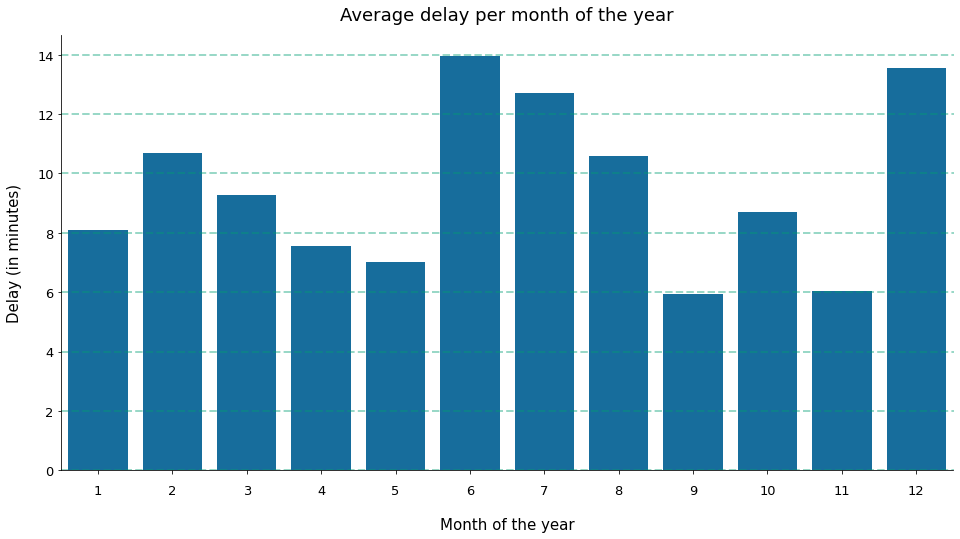

In [23]:
#plotting a barplot to visualise the average delay per month of the year
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

sns.barplot(x= 'Month', y = 'Avg_delay', data = monthly_delays, color = my_palette[0])
plt.grid(color= my_palette[2], linestyle='--',linewidth=2, axis='y', alpha=0.4)
ax.set_ylabel('Delay (in minutes)', size = 15, labelpad = 15)
ax.set_xlabel('Month of the year', size = 15, labelpad = 20)
ax.set_title('Average delay per month of the year', size = 18, pad = 15)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13, pad = 10)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Delay per month.png", bbox_inches = 'tight')
plt.show()

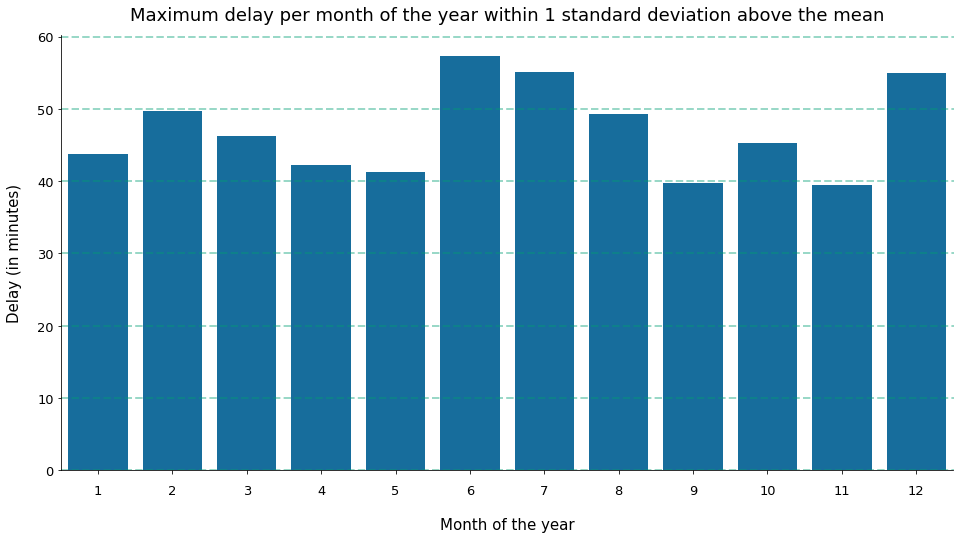

In [24]:
#plotting a barplot to visualise the maximum delay per month of the year within 1 standard deviation above the mean
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

sns.barplot(x= 'Month', y = 'Max_delay', data = monthly_delays, color = my_palette[0])
plt.grid(color= my_palette[2], linestyle='--',linewidth=2, axis='y', alpha=0.4)
ax.set_ylabel('Delay (in minutes)', size = 15, labelpad = 15)
ax.set_xlabel('Month of the year', size = 15, labelpad = 20)
ax.set_title('Maximum delay per month of the year within 1 standard deviation above the mean', size = 18, pad = 15)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13, pad = 10)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Max delay per month.png", bbox_inches = 'tight')
plt.show()

In [25]:
#November is the month in which passengers are most likely to minimze their delays.

In [26]:
#creating a lambda function to map months to seasons
season = lambda month: 'Spring' if month in [3, 4, 5] else \
                           'Summer' if month in [6, 7, 8] else \
                           'Autumn' if month in [9, 10, 11] else 'Winter'

In [27]:
#mapping the months to their relevant season by applying the above lamda function, and storing it in a new column
q1['Season'] = df['Month'].apply(season)

In [28]:
#calculating the average and standard deviation of delays for each season
seasonal_delays = q1.groupby('Season', as_index=False).agg(Avg_delay=('ArrDelay', 'mean'),
                                                    Standard_deviation=('ArrDelay', 'std'))

#getting the max delays of the time slots within one standard deviation above the mean
seasonal_delays['Max_delay'] = (seasonal_delays['Avg_delay'] + seasonal_delays['Standard_deviation'])

In [29]:
#checking the seasonal delays
seasonal_delays.head()

,Season,Avg_delay,Standard_deviation,Max_delay
0,Autumn,6.918309,34.693812,41.612120
1,Spring,7.950428,35.322732,43.273160
2,Summer,12.388899,41.500819,53.889718
3,Winter,10.892039,38.907755,49.799794


In [30]:
#rearranging the seasons
seasonal_delays = seasonal_delays.reindex([1, 2, 0, 3])

In [31]:
#getting the number of flights in each 2 hour time slot
q1['Season'].value_counts()

Summer    1504062
Autumn    1460459
Spring    1455009
Winter    1331316
Name: Season, dtype: int64

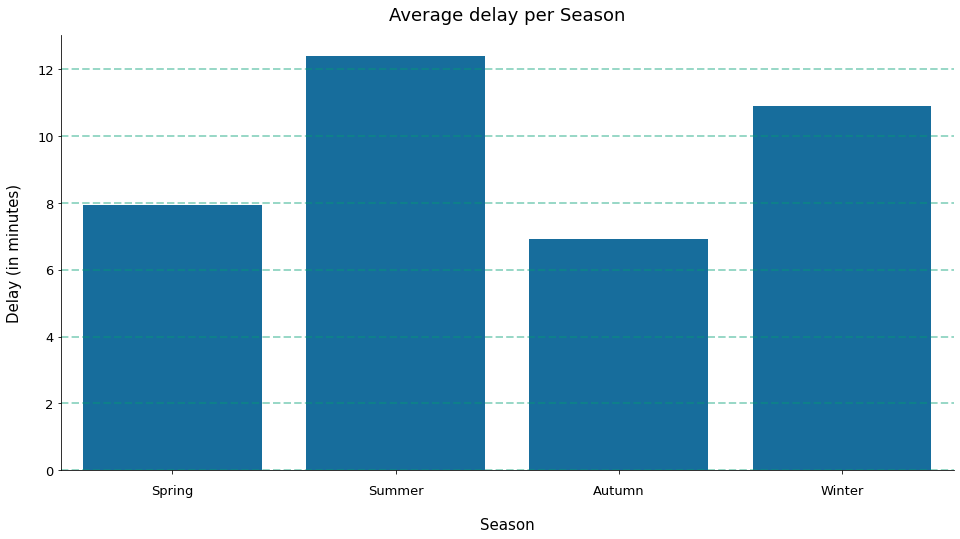

In [32]:
#plotting a barplot to visualise the average delay per season
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

sns.barplot(x= 'Season', y = 'Avg_delay', data = seasonal_delays, color = my_palette[0])
plt.grid(color= my_palette[2], linestyle='--',linewidth=2, axis='y', alpha=0.4)
ax.set_ylabel('Delay (in minutes)', size = 15, labelpad = 15)
ax.set_xlabel('Season', size = 15, labelpad = 20)
ax.set_title('Average delay per Season', size = 18, pad = 15)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13, pad = 10)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Delay per season.png", bbox_inches = 'tight')
plt.show()

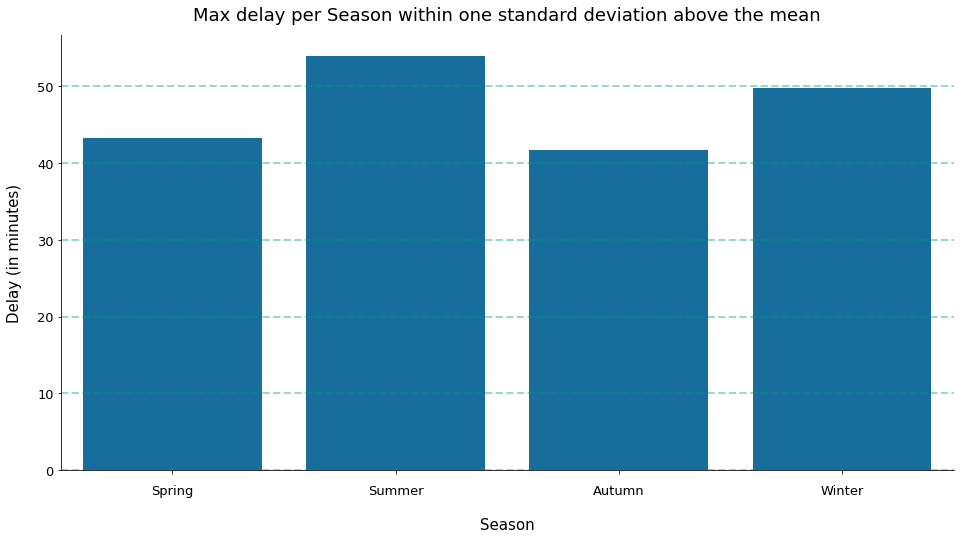

In [33]:
#plotting a barplot to visualise the maximum delay per season within 1 standard deviation above the mean
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

sns.barplot(x= 'Season', y = 'Max_delay', data = seasonal_delays, color = my_palette[0])
plt.grid(color= my_palette[2], linestyle='--',linewidth=2, axis='y', alpha=0.4)
ax.set_ylabel('Delay (in minutes)', size = 15, labelpad = 15)
ax.set_xlabel('Season', size = 15, labelpad = 20)
ax.set_title('Max delay per Season within one standard deviation above the mean', size = 18, pad = 15)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13, pad = 10)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig("Max delay per season.png", bbox_inches = 'tight')
plt.show()

In [34]:
#Autumn is the season in which passengers are most likely to minimize their delays.